<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [9]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import norm
import scipy.stats as stats
from math import sqrt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway

#### Read the dataset in the csv file from the URL


In [11]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [12]:
Viviendas=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [13]:
Viviendas.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


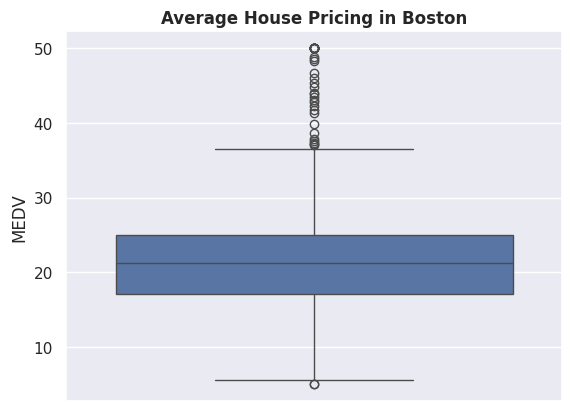

In [14]:
# Para el "Valor medio de las viviendas ocupadas por sus propietarios" proporcione un diagrama de caja (boxplot)

Boxplot = sns.boxplot(y= 'MEDV', data= Viviendas)
Boxplot.set_title('Average House Pricing in Boston', weight='bold')
plt.show()

Text(0.5, 1.05, 'Houses near the Charles River')

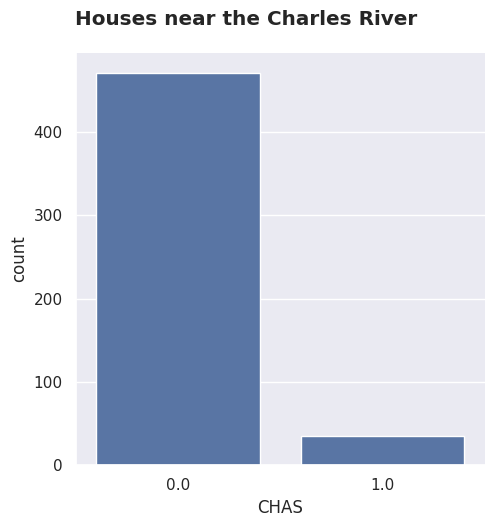

In [15]:
# Proporcione un diagrama de barras para la variable "Río Charles"

BarChart= sns.catplot(x='CHAS', data= Viviendas, kind= 'count')
BarChart.fig.suptitle('Houses near the Charles River', weight='bold', y=1.05)

Text(0.5, 1.05, 'Houses near the Charles River')

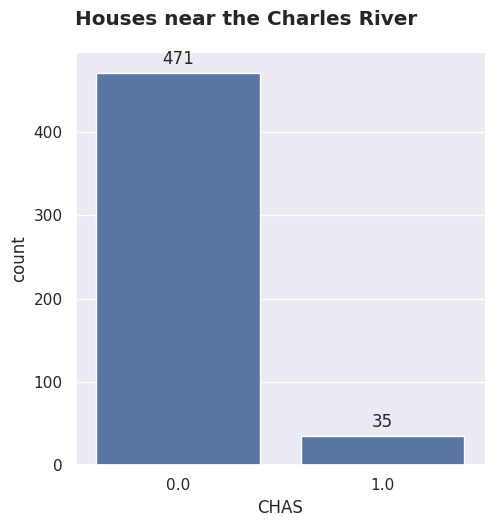

In [16]:
# Proporcione un diagrama de barras para la variable "río Charles

BarChart = sns.catplot(x='CHAS', data=Viviendas, kind='count')

for ax in BarChart.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

BarChart.fig.suptitle('Houses near the Charles River', weight='bold', y=1.05)

# 1 representa la cantidad de casas junto al rio

In [17]:
#Creamos grupos de edad para poder separar los precios de las casas

Viviendas['Age_group'] = pd.cut(Viviendas['AGE'], 
                                 bins=[0, 35, 70, 100], 
                                 labels=['35 o menos', '35 a 70', '70 o más'])

Text(0.5, 1.0, 'Boxplot of Pricing by Age Group')

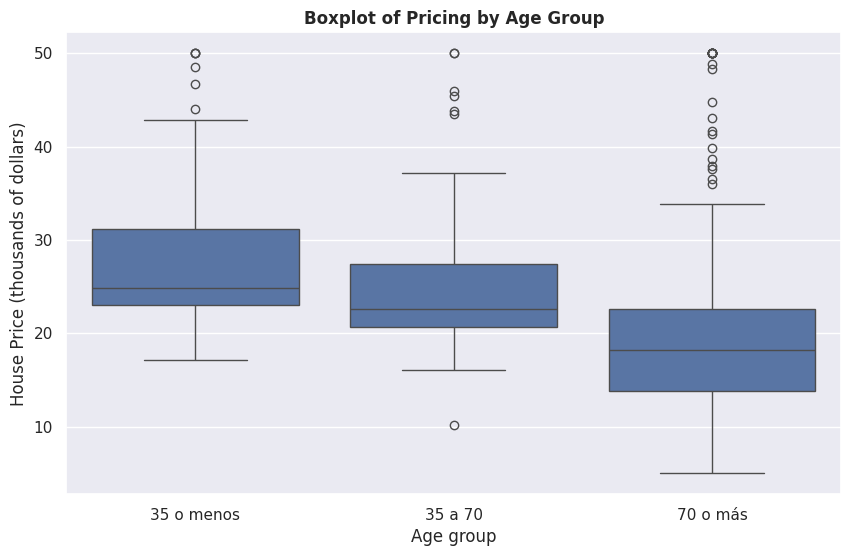

In [18]:
# Hacemos los Boxplots del precio medio de las casas para los diferentes grupos de edad de la construccion

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_group', y='MEDV', data=Viviendas)
plt.ylabel('House Price (thousands of dollars)')
plt.xlabel('Age group')
plt.title('Boxplot of Pricing by Age Group', weight= 'bold')

Text(0.5, 1.0, 'Grafico de Dispercion: Relacion Acres-Nitrógeno')

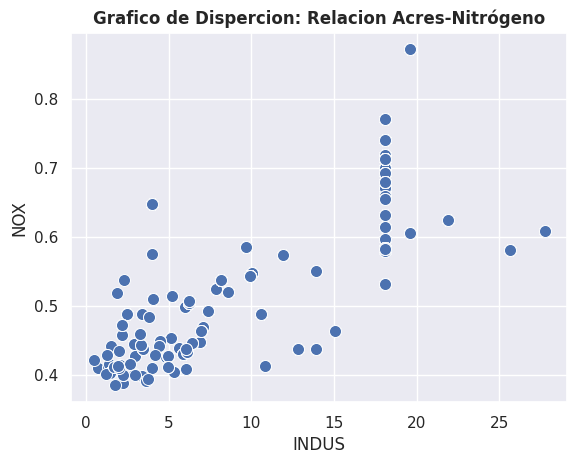

In [23]:
# Hacemos el diagrama de disperccion para estudiar graficamente la relacion entre la cantidad de acres por localidad y la 
# concentracion de oxido nicotico en el aire

ScatterPlot = sns.scatterplot(x='INDUS', y='NOX', data=Viviendas, s=75)
plt.title('Grafico de Dispercion: Relacion Acres-Nitrógeno', weight= 'bold')

Text(0.5, 1.0, 'Relacion Acres-Nitrogeno')

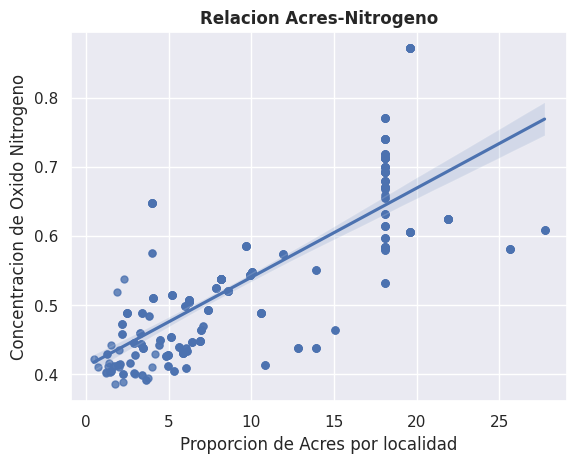

In [19]:
ScatterPlot2 = sns.regplot(x='INDUS', y='NOX', data=Viviendas, scatter_kws={'s': 25})
plt.ylabel('Concentracion de Oxido Nitrogeno')
plt.xlabel('Proporcion de Acres por localidad')
plt.title('Relacion Acres-Nitrogeno', weight= 'bold')

Text(0.5, 1.0, 'Proporcion de alumnos por profeson en Boston')

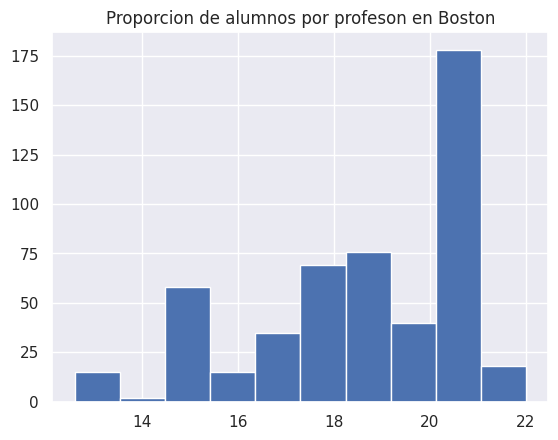

In [25]:
plt.hist(Viviendas['PTRATIO'])
plt.title('Proporcion de alumnos por profeson por ciudad')

In [28]:
# H0) NO Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles
# H1) SI Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles

PruebaT = stats.ttest_ind(Viviendas[Viviendas['CHAS'] == 1]['MEDV'],
                          Viviendas[Viviendas['CHAS'] == 0]['MEDV'])
print(PruebaT)

# P-Valor es menor a 0,05 por lo que rechazamos H0 y por lo tanto concluimos que si existe una diferencia en el valor de las 
# casas delimitadas por el rio Charles

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)


In [ ]:
Viviendas.head()

In [29]:
Menos35 = Viviendas[Viviendas['AGE'] < 35]['MEDV'] 
Entre35y70 = Viviendas[(Viviendas['AGE'] >= 35) & (Viviendas['AGE'] <= 70)]['MEDV']
Mas70 = Viviendas[Viviendas['AGE'] > 70]['MEDV']

In [30]:
# H0) NO Existe alguna diferencia en los valores medios de las casas para cada proporción de unidades construidas antes de 1940
# H1) SI Existe alguna diferencia en los valores medios de las casas para cada proporción de unidades construidas antes de 1940

f_statistic, p_value = stats.f_oneway(Menos35, Entre35y70, Mas70)
print("F-Statistic: {0}, P-Value: {1}".format(f_statistic, p_value))

# P-Valor es menor a 0,05 por lo que rechazamos H0 y por lo tanto concluimos que si existe una diferencia en el valor de las 
# casas dependiendo de la fecha de construccion

F-Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [31]:
# H0) NO Existe Correlacion entre las variables
# H1) SI Existe Correlacion entre las variables

stats.pearsonr(Viviendas['NOX'], Viviendas['INDUS'])

# P-Valor es menor a 0,05 por lo que rechazamos H0 y por lo tanto concluimos que si existe una Correlacion entre la cantidad
# de Acres por localidad y la concentracion de oxido nitrico en el aire. 

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [34]:
# H0) NO Existe Correlacion entre el valor de las casas y la distancia a los 5 centros de empleo de Boston
# H1) SI Existe Correlacion entre el valor de las casas y la distancia a los 5 centros de empleo de Boston

y = Viviendas['MEDV']
x = Viviendas['DIS']
x =sm.add_constant(x)
Modelo = sm.OLS(y,x).fit()
predictions = Modelo.predict()

In [33]:
Modelo.summary()

# Podemos decir que el hecho de estar 1 unidad de distancia mas cerca de los cinco centros de empleos de Boston conlleva en 
# promedio un aumento del precio de la vivienda en 1.09 miles de dolares. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        20:17:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""